In [1]:
import numpy as np
import pandas as pd

rs_filename = "/home/pmalonis/lfads_analysis/data/intermediate/rockstar.p"
active_filename = "/home/pmalonis/lfads_analysis/data/intermediate/mk080729_active.p"
vis_filename = "/home/pmalonis/lfads_analysis/data/intermediate/mk080729_vis_pb.p"
prop_filename = "/home/pmalonis/lfads_analysis/data/intermediate/mk080729_prop_pb.p"
dual_filename = "/home/pmalonis/lfads_analysis/data/intermediate/mk080729_dual_pb.p"
rs_df = pd.read_pickle(rs_filename)
active_df = pd.read_pickle(active_filename)
vis_df = pd.read_pickle(vis_filename)
prop_df = pd.read_pickle(prop_filename)
dual_df = pd.read_pickle(dual_filename)

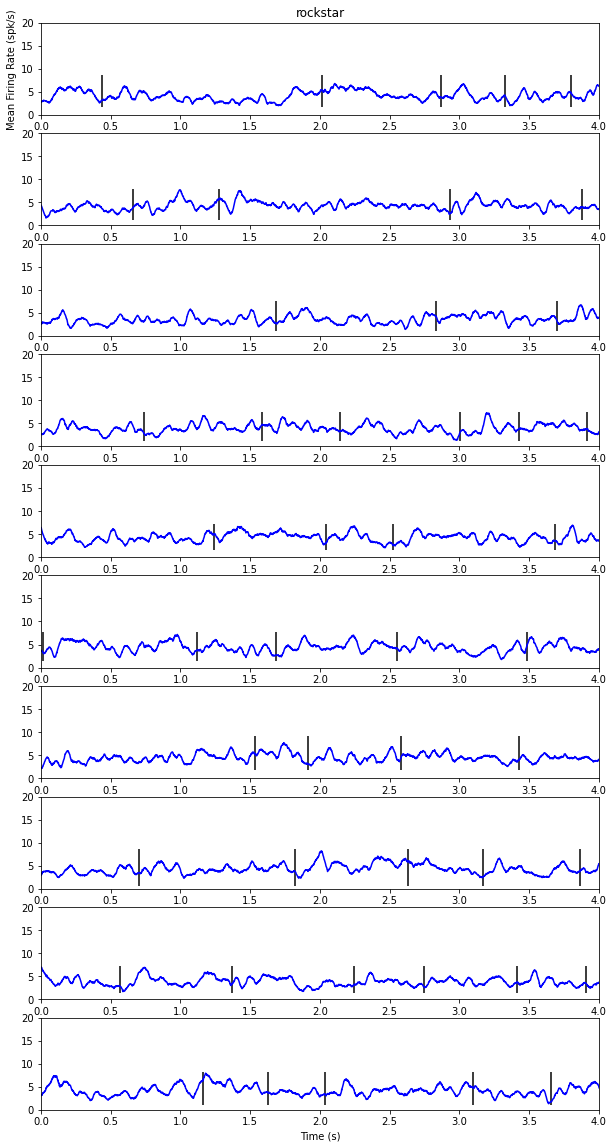

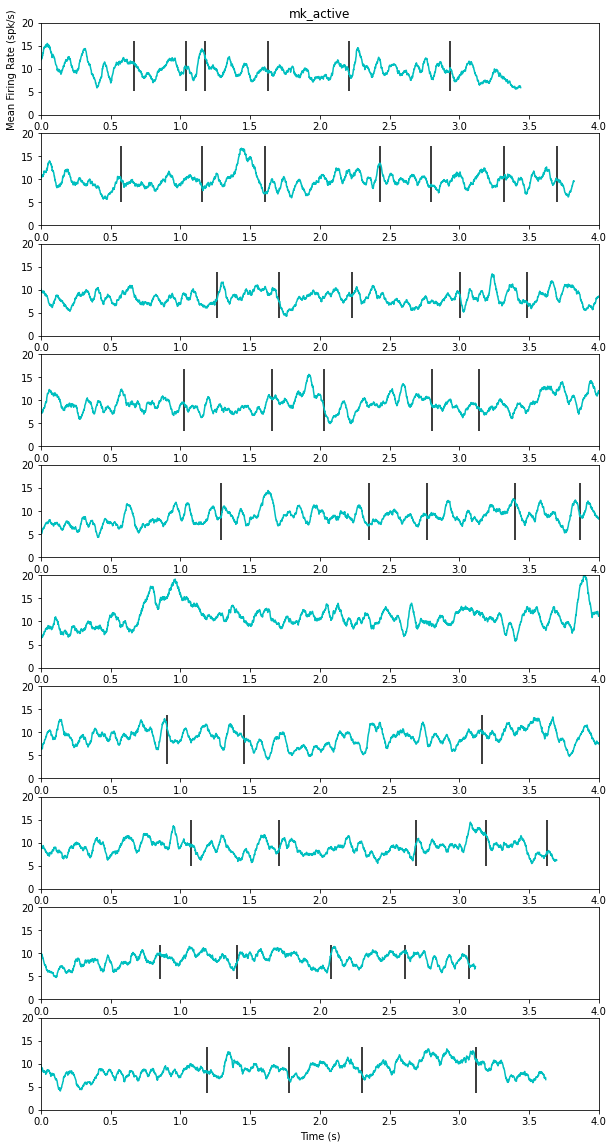

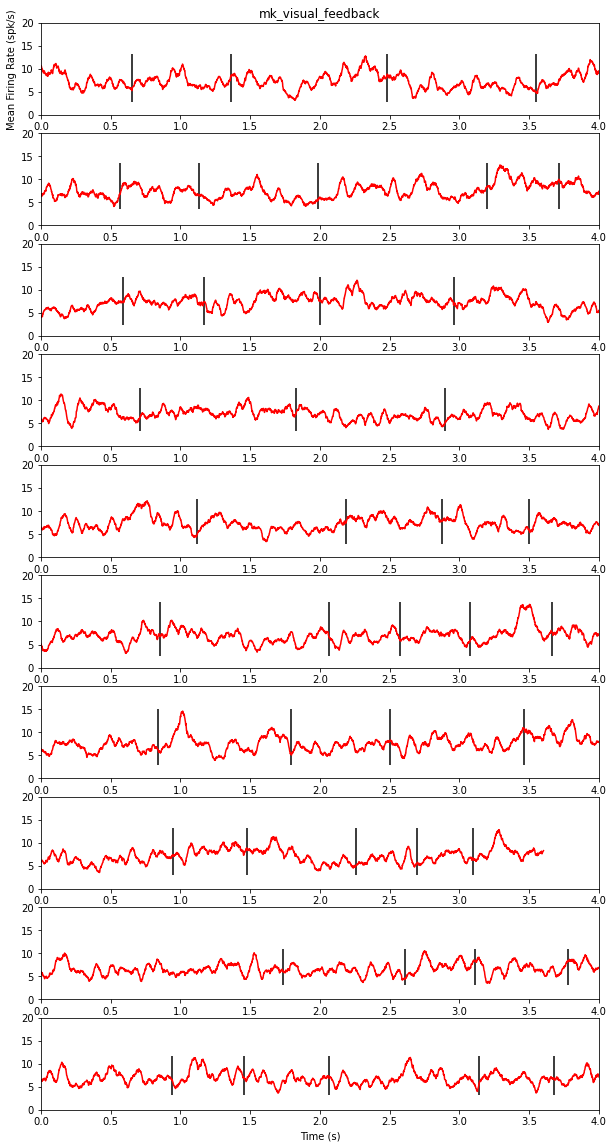

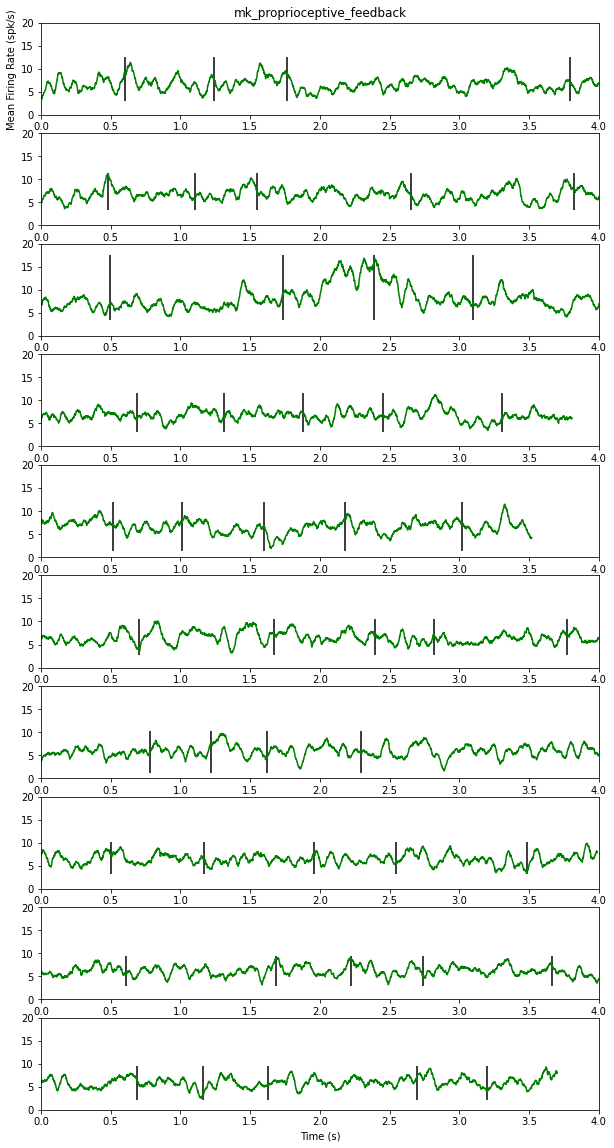

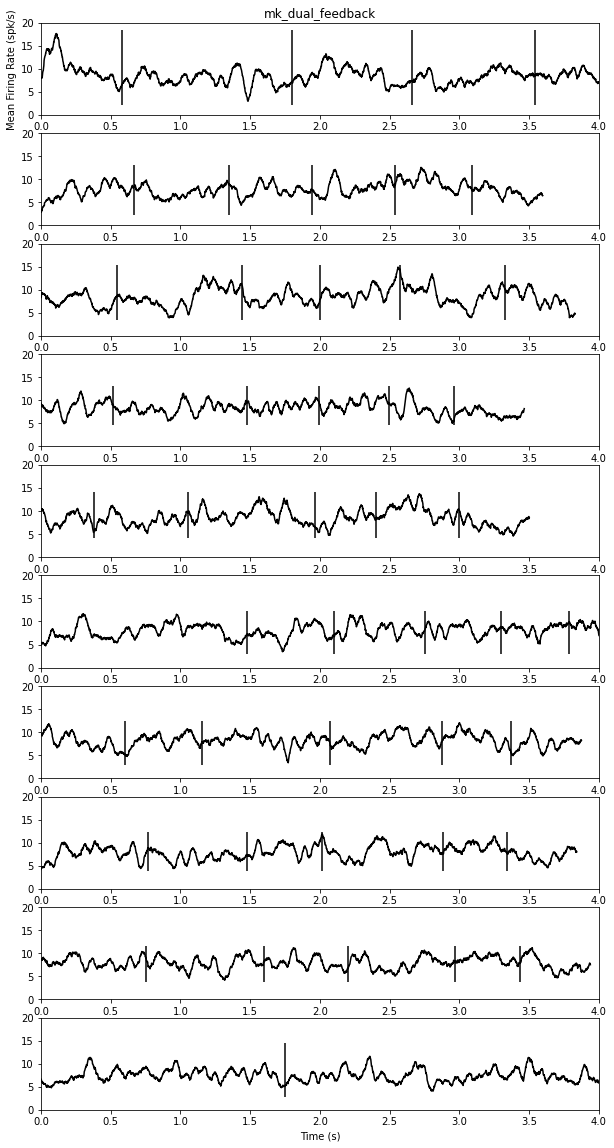

In [6]:
import matplotlib.pyplot as plt

def plot_mean_rate(trial_df, color, title=''):
    t = trial_df.index.values
    trial_df = trial_df.copy()
    trial_df.neural = trial_df.neural * 1000
    pop_rate = trial_df.neural.rolling(60, min_periods=30, center=True, win_type='gaussian').mean(std=20).values.sum(1)
    mean_rate = pop_rate/trial_df.neural.shape[1]
    t_targets = trial_df.kinematic.query('hit_target').index[1:]
    plt.plot(t, mean_rate, color)
    plt.vlines(t_targets, *plt.ylim())
    plt.title(title)

n_trials = 10
dset_dict = {'rockstar': rs_df,
'mk_active': active_df,
'mk_visual_feedback': vis_df,
'mk_proprioceptive_feedback': prop_df,
'mk_dual_feedback': dual_df}
color = 'bcrgk'
for j, (dset_name, dset_df) in enumerate(dset_dict.items()):
    plt.figure(figsize=(10,20))
    for i in range(n_trials):
        plt.subplot(n_trials, 1, i+1)
        trial_df = dset_df.loc[i]
        if i == 0:
            plot_mean_rate(trial_df, color=color[j], title=dset_name)
            plt.ylabel('Mean Firing Rate (spk/s)')
        else:
            plot_mean_rate(trial_df, color=color[j])
        plt.ylim([0, 20])
        plt.xlim([0, 4])

    plt.xlabel('Time (s)')
    


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
pca.fit()